In [1]:
import pandas as pd

# Assuming the file is in the same directory as your notebook
file_path = 'simulated_transaction_2024.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())


C:\Users\carlo\AppData\Local\Temp\ipykernel_13388\1011742589.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0                     NaN   

     Third Party Name  
0  Westport Care Home  
1    Barbiee Boutique  
2                 NaN  
3                 NaN  
4            Fat Face  


In [2]:
# Combine Date and Timestamp columns and convert to datetime
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], dayfirst=True)

# Drop the original Date and Timestamp columns as they are now redundant
data.drop(['Date', 'Timestamp'], axis=1, inplace=True)


In [3]:
# Assuming NaN values are handled and 'Account No' and 'Third Party Account No' are converted to integers

# Convert 'Account No' to strings, ensuring no decimals
data['Account No'] = data['Account No'].apply(lambda x: str(int(x)))

# Apply 'zfill' to each value in 'Third Party Account No' after converting each to integer and then to string
data['Third Party Account No'] = data['Third Party Account No'].apply(lambda x: str(int(x)).zfill(9))


ValueError: cannot convert float NaN to integer

In [4]:
data['Account No'] = data['Account No'].apply(lambda x: str(int(x)))
data['Third Party Account No'] = data['Third Party Account No'].apply(lambda x: str(x).zfill(9))



ValueError: cannot convert float NaN to integer

In [5]:
data['Balance'] = data['Balance'].round(2)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Third Party Name Encoded'] = encoder.fit_transform(data['Third Party Name'])



In [ ]:
# First, ensure your DateTime column is in the correct datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Create a new feature for the date (without time)
data['Date'] = data['DateTime'].dt.date

# Calculate daily transaction frequency for each account
data['Daily Transaction Count'] = data.groupby(['Account No', 'Date'])['DateTime'].transform('count')


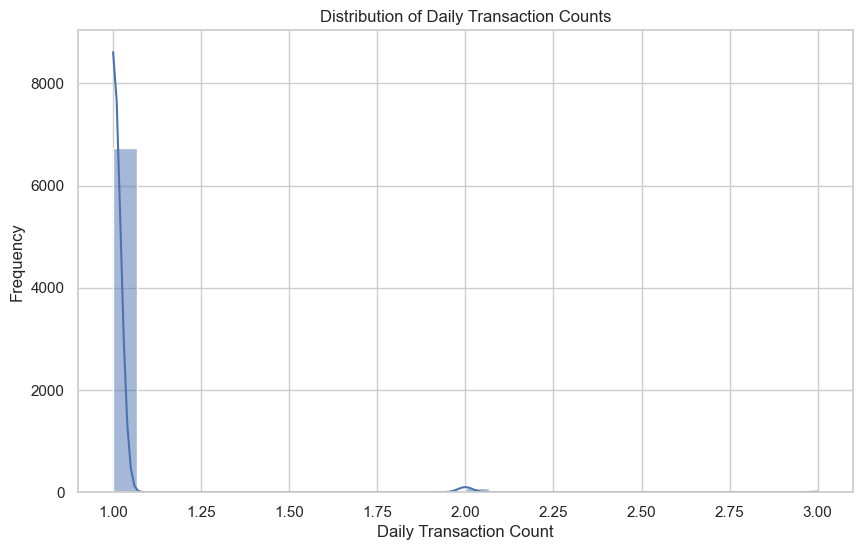

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Transaction Count'], bins=30, kde=True)
plt.title('Distribution of Daily Transaction Counts')
plt.xlabel('Daily Transaction Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calculate the average transaction amount for each account
data['Avg Transaction Amount'] = data.groupby('Account No')['Amount'].transform('mean')

# Flag transactions that are more than 2x the account's average
data['Large Transaction'] = (data['Amount'] > 2 * data['Avg Transaction Amount']).astype(int)


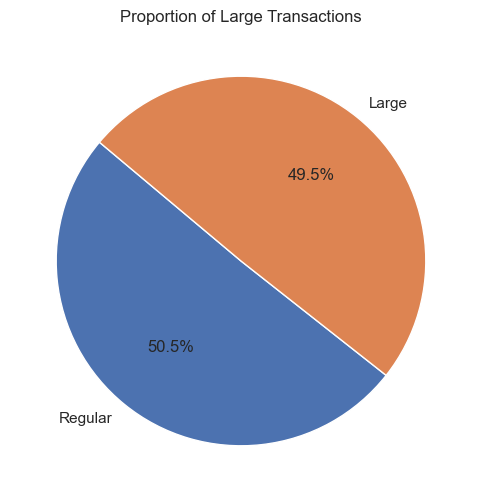

In [ ]:
plt.figure(figsize=(6, 6))
data['Large Transaction'].value_counts().plot(kind='pie', labels=['Regular', 'Large'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Large Transactions')
plt.ylabel('')
plt.show()


In [ ]:
# Sort data by DateTime to ensure transactions are in order
data.sort_values(by=['Account No', 'DateTime'], inplace=True)

# Create a flag for new third-party interaction
data['New Third Party'] = data.groupby(['Account No', 'Third Party Account No']).cumcount() == 0
data['New Third Party'] = data['New Third Party'].astype(int)


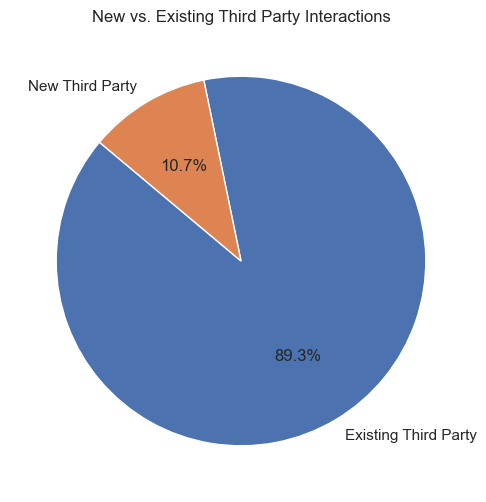

In [ ]:
plt.figure(figsize=(6, 6))
data['New Third Party'].value_counts().plot(kind='pie', labels=['Existing Third Party', 'New Third Party'], autopct='%1.1f%%', startangle=140)
plt.title('New vs. Existing Third Party Interactions')
plt.ylabel('')
plt.show()


In [ ]:
# Extract hour of the day from DateTime
data['Transaction Hour'] = data['DateTime'].dt.hour

# You might create flags for transactions in the odd hours (e.g., 00:00-06:00)
data['Odd Hours Transaction'] = data['Transaction Hour'].apply(lambda x: 1 if 0 <= x <= 6 else 0)


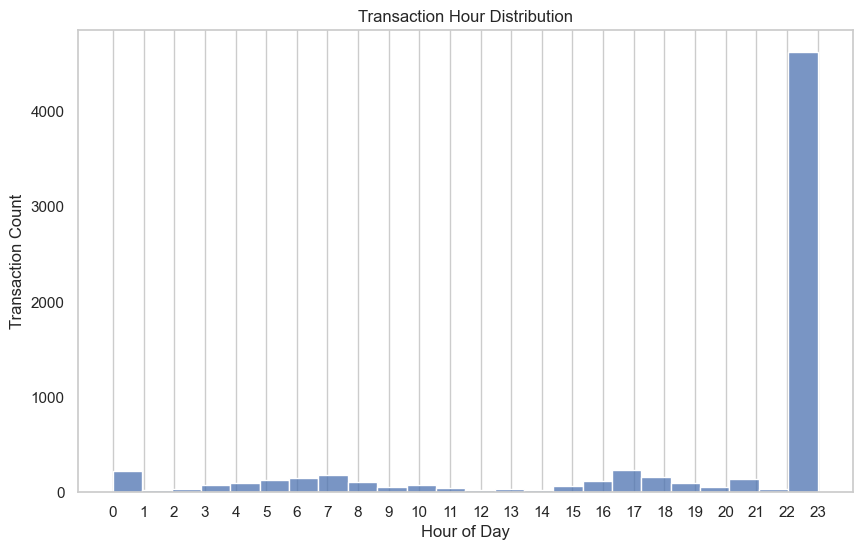

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction Hour'], bins=24, kde=False)
plt.title('Transaction Hour Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


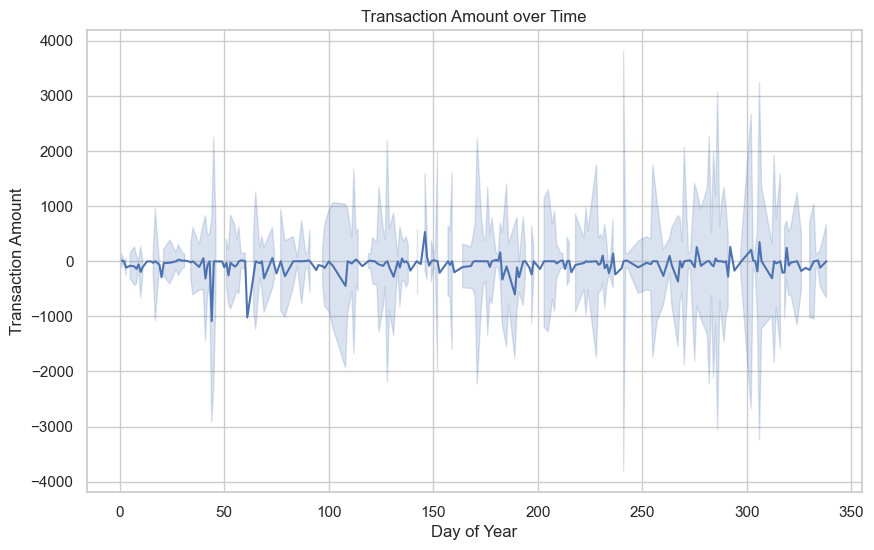

In [ ]:
# Convert dates to a numerical format for plotting (e.g., day of the year for simplicity)
data['DayOfYear'] = data['DateTime'].dt.dayofyear

# Now you can plot a time series or analyze correlations safely
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayOfYear', y='Amount', data=data)
plt.title('Transaction Amount over Time')
plt.xlabel('Day of Year')
plt.ylabel('Transaction Amount')
plt.show()


In [ ]:
data.head()


,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Third Party Name Encoded,Date,Daily Transaction Count,Avg Transaction Amount,Large Transaction,New Third Party,Transaction Hour,Odd Hours Transaction,DayOfYear
94,104832000,2385.00,-670.0,587923845,NaN,2023-01-01 00:00:00,0,2023-01-01,1.0,-542.142857,1,1,0.0,1,1.0
21860,104832000,1072.17,-670.0,587923845,NaN,2023-01-31 23:59:00,0,2023-01-31,1.0,-542.142857,1,0,23.0,0,31.0
33486,104832000,50.80,290.0,587923845,NaN,2023-02-15 06:57:00,0,2023-02-15,1.0,-542.142857,1,0,6.0,1,46.0
39855,104832000,600.28,-670.0,587923845,NaN,2023-02-28 23:59:00,0,2023-02-28,1.0,-542.142857,1,0,23.0,0,59.0
57743,104832000,127.77,-670.0,587923845,NaN,2023-03-31 23:59:00,0,2023-03-31,1.0,-542.142857,1,0,23.0,0,90.0


In [ ]:
# Example feature selection - adjust according to your dataset and analysis
features = ['Balance', 'Amount', 'Daily Transaction Count', 'Large Transaction', 'New Third Party', 'Odd Hours Transaction']
X = data[features]


In [ ]:
# Dropping rows with NaN values
X = X.dropna()


In [ ]:
from sklearn.ensemble import IsolationForest

# Assuming NaN values have been handled in X
iforest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model on the cleaned dataset
iforest.fit(X)

# Predict anomalies (-1 for anomalies, 1 for normal)
anomalies = iforest.predict(X)

# If you dropped rows, you need to ensure you correctly map back the predictions
# Here's one way to do it, assuming X has the same index as your original DataFrame
data['anomaly'] = pd.Series(anomalies, index=X.index)


In [ ]:
# Count of detected anomalies
anomalies = data[data['anomaly'] == -1]
normal = data[data['anomaly'] == 1]

print(f"Number of anomalies detected: {len(anomalies)}")
print(f"Number of normal transactions: {len(normal)}")


Number of anomalies detected: 69
Number of normal transactions: 6736


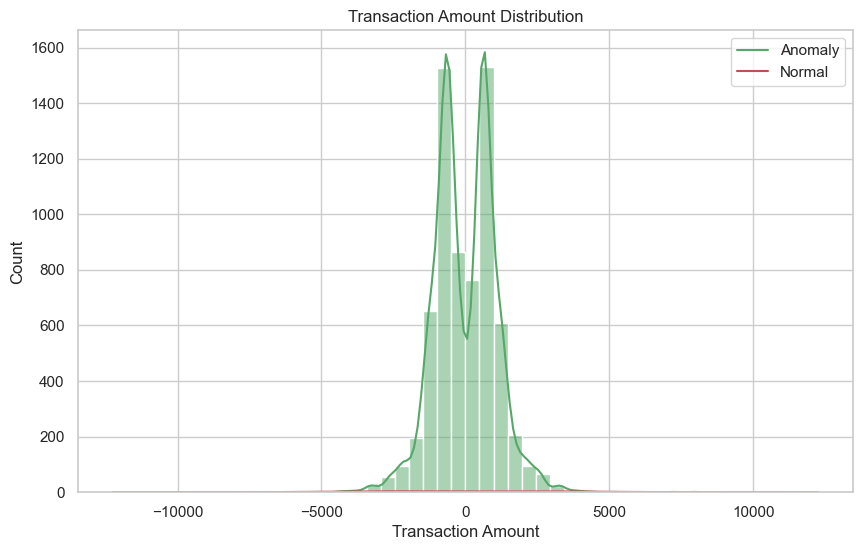

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', hue='anomaly', bins=50, kde=True, palette={-1: 'r', 1: 'g'})
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend(['Anomaly', 'Normal'])
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'X' contains your feature set
# Handling missing values, if any
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X))
X_imputed.columns = X.columns
X_imputed.index = X.index

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Applying K-Means with a chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster information to the DataFrame
X_imputed['cluster'] = clusters


In [ ]:
# Calculate the distance of each point from its cluster centroid
distances = kmeans.transform(X_scaled)
X_imputed['distance'] = np.min(distances, axis=1)

# Calculate the average distance and standard deviation in each cluster
cluster_stats = X_imputed.groupby('cluster')['distance'].agg(['mean', 'std'])

# Merge this info back into the original DataFrame
X_imputed = X_imputed.merge(cluster_stats, left_on='cluster', right_index=True)

# Flag outliers as those whose distance is significantly higher than the average of their cluster
X_imputed['outlier'] = ((X_imputed['distance'] - X_imputed['mean']) > 2 * X_imputed['std']).astype(int)



In [ ]:
# Review the transactions flagged as outliers
outliers = X_imputed[X_imputed['outlier'] == 1]

print("Number of outliers detected:", len(outliers))


Number of outliers detected: 288


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Amount' and 'Daily Transaction Count' are in your DataFrame
# and you want to use them for the x and y axes in the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_imputed, x='Amount', y='Transaction Hour', hue='cluster', style='outlier', palette='viridis')
plt.title('Transaction Clusters and Outliers')
plt.xlabel('Amount')  # Adjust this label to match your actual feature name
plt.ylabel('Daily Transaction Count')  # Adjust this label to match your actual feature name
plt.show()



ValueError: Could not interpret value `Transaction Hour` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
data.head()

,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Third Party Name Encoded,Date,Daily Transaction Count,Avg Transaction Amount,Large Transaction,New Third Party,Transaction Hour,Odd Hours Transaction,DayOfYear,anomaly
94,104832000,2385.00,-670.0,587923845,NaN,2023-01-01 00:00:00,0,2023-01-01,1.0,-542.142857,1,1,0.0,1,1.0,1.0
21860,104832000,1072.17,-670.0,587923845,NaN,2023-01-31 23:59:00,0,2023-01-31,1.0,-542.142857,1,0,23.0,0,31.0,1.0
33486,104832000,50.80,290.0,587923845,NaN,2023-02-15 06:57:00,0,2023-02-15,1.0,-542.142857,1,0,6.0,1,46.0,1.0
39855,104832000,600.28,-670.0,587923845,NaN,2023-02-28 23:59:00,0,2023-02-28,1.0,-542.142857,1,0,23.0,0,59.0,1.0
57743,104832000,127.77,-670.0,587923845,NaN,2023-03-31 23:59:00,0,2023-03-31,1.0,-542.142857,1,0,23.0,0,90.0,1.0


In [ ]:
import pandas as pd

# Sample data creation (you should skip this step if you already have your DataFrame loaded)
# data = pd.DataFrame({
#     'Amount': [-100, 200, -50, 150, -20]
# })

# Creating the 'Income' column where negative values are set to 0
data['Income'] = data['Amount'].apply(lambda x: x if x > 0 else 0)

# Creating the 'Outcome' column where positive values are set to 0, and negatives are converted to positive
data['Outcome'] = data['Amount'].apply(lambda x: -x if x < 0 else 0)

# Display the updated DataFrame to verify the new columns
print(data)


C:\Users\carlo\AppData\Local\Temp\ipykernel_25744\208296642.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


NameError: name 'data' is not defined